<a href="https://colab.research.google.com/github/showpiecep/AutoEncoder/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!unzip /content/df_lab3.zip -d /content/

Archive:  /content/df_lab3.zip
  inflating: /content/dataset_group.csv  


In [ ]:
import pandas as pd
import numpy as np
all_data = pd.read_csv('dataset_group.csv',header=None)
#В файле нет строки с названием столбцов, поэтому параметр header равен None.
#Интерес представляет информация об id покупателя - столбец с названием 1
#Название купленного товара хранится в столбце с названием 2
all_data.head()

,0,1,2
0,2000-01-01,1,yogurt
1,2000-01-01,1,pork
2,2000-01-01,1,sandwich bags
3,2000-01-01,1,lunch meat
4,2000-01-01,1,all- purpose


In [ ]:
unique_id = list(set(all_data[1]))
print(len(unique_id)) #Выведем количество id

1139


In [ ]:
items = list(set(all_data[2]))
print(len(items)) #Выведем количество товаров

38


In [ ]:
dataset = [[elem for elem in all_data[all_data[1] == id][2] if elem in items] for id in unique_id]

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
df.head()

,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,vegetables,waffles,yogurt
0,True,True,False,True,True,False,False,False,True,False,...,True,True,True,False,False,False,False,True,False,True
1,False,True,False,False,False,True,True,False,False,True,...,True,False,False,False,False,True,True,True,True,True
2,False,False,True,False,False,True,True,False,True,False,...,True,True,True,True,False,True,False,True,False,False
3,True,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
4,True,False,False,False,False,False,False,False,True,False,...,False,False,True,True,False,True,True,True,True,True


In [ ]:
from mlxtend.frequent_patterns import apriori
results = apriori(df, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x)) #добавление размера набора
print(results)

     support                                    itemsets  length
0   0.374890                              (all- purpose)       1
1   0.384548                             (aluminum foil)       1
2   0.385426                                    (bagels)       1
3   0.374890                                      (beef)       1
4   0.367867                                    (butter)       1
5   0.395961                                   (cereals)       1
6   0.390694                                   (cheeses)       1
7   0.379280                                (coffee/tea)       1
8   0.388938                              (dinner rolls)       1
9   0.388060              (dishwashing liquid/detergent)       1
10  0.389816                                      (eggs)       1
11  0.352941                                     (flour)       1
12  0.370500                                    (fruits)       1
13  0.345917                                 (hand soap)       1
14  0.398595             

Вывод представляет из себя набор элементов с минимальным выставленным порогом поддержки 0.3. То есть в df данный набор встречается минимум 30%. Length показывает количество элементов в наборе

In [ ]:
results = apriori(df, min_support=0.3, use_colnames=True, max_len=1)
print(results)

     support                        itemsets
0   0.374890                  (all- purpose)
1   0.384548                 (aluminum foil)
2   0.385426                        (bagels)
3   0.374890                          (beef)
4   0.367867                        (butter)
5   0.395961                       (cereals)
6   0.390694                       (cheeses)
7   0.379280                    (coffee/tea)
8   0.388938                  (dinner rolls)
9   0.388060  (dishwashing liquid/detergent)
10  0.389816                          (eggs)
11  0.352941                         (flour)
12  0.370500                        (fruits)
13  0.345917                     (hand soap)
14  0.398595                     (ice cream)
15  0.375768              (individual meals)
16  0.376646                         (juice)
17  0.371378                       (ketchup)
18  0.378402             (laundry detergent)
19  0.395083                    (lunch meat)
20  0.380158                          (milk)
21  0.3757

In [ ]:
results = apriori(df, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x))
results = results[results['length'] == 2]
print(results)
print('\nCount of result itemstes = ',len(results))

     support                                    itemsets  length
38  0.310799                 (aluminum foil, vegetables)       2
39  0.300263                        (vegetables, bagels)       2
40  0.310799                       (vegetables, cereals)       2
41  0.309043                       (vegetables, cheeses)       2
42  0.308165                  (dinner rolls, vegetables)       2
43  0.306409  (vegetables, dishwashing liquid/detergent)       2
44  0.326602                          (eggs, vegetables)       2
45  0.302897                     (ice cream, vegetables)       2
46  0.309043             (vegetables, laundry detergent)       2
47  0.311677                    (vegetables, lunch meat)       2
48  0.331870                       (vegetables, poultry)       2
49  0.305531                          (vegetables, soda)       2
50  0.315189                       (waffles, vegetables)       2
51  0.319579                        (vegetables, yogurt)       2

Count of result itemstes

/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/apriori.py:158: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  itemsets = pd.Series([frozenset(i) for i in itemset_dict[k]])
/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/apriori.py:158: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  itemsets = pd.Series([frozenset(i) for i in itemset_dict[k]])
/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/apriori.py:158: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  itemsets = pd.Series([frozenset(i) for i in itemset_dict[k]])


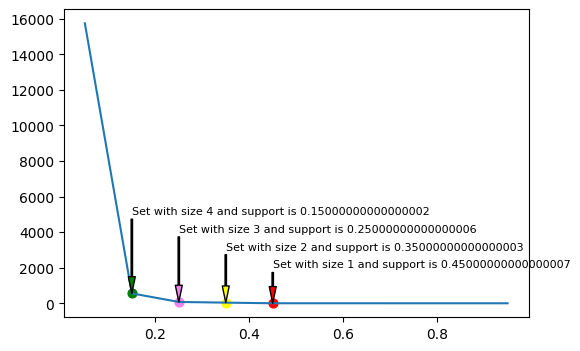

In [ ]:
import matplotlib.pyplot as plt
supports = np.arange(0.05, 1.0, 0.1)
len_results = []
max_lens = []
for i in supports:
    results = apriori(df, min_support=i, use_colnames=True)
    results['length'] = results['itemsets'].apply(lambda x: len(x))
    len_results.append(len(results))
    if len(results) > 0:
        max_lens.append(max(results['length']))

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(supports, len_results)

ax.scatter(supports[max_lens[3]],
           len_results[max_lens[3]],
           color='green', s=40,
           marker='o')
ax.annotate(f'Set with size 4 and support is {supports[max_lens[3]]}',
            xy=(supports[max_lens[3]],
            len_results[max_lens[3]]),
            xytext=(0.15, 5000),
            fontsize=8,
            arrowprops=dict(facecolor='green', width=1, headwidth=5))

ax.scatter(supports[max_lens[2]],
           len_results[max_lens[2]],
           color='violet', s=40, 
           marker='o')
ax.annotate(f'Set with size 3 and support is {supports[max_lens[2]]}',
            xy=(supports[max_lens[2]], len_results[max_lens[2]]),
            xytext=(0.25, 4000),
            fontsize=8,
            arrowprops=dict(facecolor='violet', width=1, headwidth=5))

ax.scatter(supports[max_lens[1]],
           len_results[max_lens[1]],
           color='yellow', s=40,
           marker='o')
ax.annotate(f'Set with size 2 and support is {supports[max_lens[1]]}',
            xy=(supports[max_lens[1]],
            len_results[max_lens[1]]),
            xytext=(0.35, 3000),
            fontsize=8,
            arrowprops=dict(facecolor='yellow', width=1, headwidth=5))

ax.scatter(supports[max_lens[0]],
           len_results[max_lens[0]],
           color='red', s=40,
           marker='o')
ax.annotate(f'Set with size 1 and support is {supports[max_lens[0]]}',
            xy=(supports[max_lens[0]], 
            len_results[max_lens[0]]),
            xytext=(0.45, 2000),
            fontsize=8,
            arrowprops=dict(facecolor='red', width=1, headwidth=5))

plt.show()

In [ ]:
results = apriori(df, min_support=0.38, use_colnames=True, max_len=1)
new_items = [list(elem)[0] for elem in results['itemsets']]
new_dataset = [[elem for elem in all_data[all_data[1] == id][2] if elem in new_items] for id in unique_id]

In [ ]:
te_new = TransactionEncoder()
te_ary_new = te_new.fit(new_dataset).transform(new_dataset)
df_new = pd.DataFrame(te_ary_new, columns=te_new.columns_)
df_new

,aluminum foil,bagels,cereals,cheeses,dinner rolls,dishwashing liquid/detergent,eggs,ice cream,lunch meat,milk,poultry,soda,vegetables,waffles,yogurt
0,True,False,False,False,True,False,False,True,True,False,False,True,True,False,True
1,True,False,True,True,False,True,False,False,False,True,False,False,True,True,True
2,False,True,True,True,True,False,True,True,True,True,True,True,True,False,False
3,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False
4,False,False,False,False,True,False,True,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,False,False,True,True,True,True,False,True,False,False,True,False,False,False,False
1135,False,False,True,True,True,True,True,False,True,True,True,False,True,False,False
1136,False,True,False,False,True,True,True,False,True,False,True,False,True,False,True
1137,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True


In [ ]:
new_results = apriori(df_new, min_support=0.3, use_colnames=True)
new_results

,support,itemsets
0,0.384548,(aluminum foil)
1,0.385426,(bagels)
2,0.395961,(cereals)
3,0.390694,(cheeses)
4,0.388938,(dinner rolls)
5,0.388060,(dishwashing liquid/detergent)
6,0.389816,(eggs)
7,0.398595,(ice cream)
8,0.395083,(lunch meat)
9,0.380158,(milk)


Сходства: порог также 0.3

Различия: стало меньше продуктов

In [ ]:
new_results = apriori(df_new, min_support=0.15, use_colnames=True)
new_results['length'] = new_results['itemsets'].apply(lambda x: len(x))
for i in range(len(new_results)):
    if new_results.iloc[i]['length'] > 1 and ('yogurt' in new_results.iloc[i]['itemsets'] or 'waffles' in new_results.iloc[i]['itemsets']):
        print(new_results.iloc[i])

support                     0.169447
itemsets    (waffles, aluminum foil)
length                             2
Name: 27, dtype: object
support                    0.177349
itemsets    (aluminum foil, yogurt)
length                            2
Name: 28, dtype: object
support              0.159789
itemsets    (waffles, bagels)
length                      2
Name: 40, dtype: object
support             0.162423
itemsets    (bagels, yogurt)
length                     2
Name: 41, dtype: object
support               0.160667
itemsets    (waffles, cereals)
length                       2
Name: 52, dtype: object
support              0.172081
itemsets    (yogurt, cereals)
length                      2
Name: 53, dtype: object
support               0.172959
itemsets    (waffles, cheeses)
length                       2
Name: 63, dtype: object
support              0.172081
itemsets    (yogurt, cheeses)
length                      2
Name: 64, dtype: object
support                    0.169447
itemsets  

In [ ]:
new_dataset_3 = [[elem for elem in all_data[all_data[1] == id][2] if elem not in new_items] for id in unique_id]
te3 = TransactionEncoder()
te_ary3 = te3.fit(new_dataset_3).transform(new_dataset_3)
df3 = pd.DataFrame(te_ary3, columns=te3.columns_)

results_3 = apriori(df3, min_support=0.05, use_colnames=True, max_len=10)

In [ ]:
from mlxtend.frequent_patterns import association_rules
def check_first_s(string_list: list) -> bool:
    return len(list(filter(lambda y: y[0] == 's', string_list))) > 1


rules_3 = association_rules(results_3, min_threshold=0.05)
rules_3["antecedent_len"] = rules_3["antecedents"].apply(lambda x: len(x))
rules_3[(rules_3['antecedent_len'] > 1) & (rules_3["antecedents"].apply(lambda x: check_first_s(list(x))))]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
1708,"(sandwich bags, sandwich loaves)",(all- purpose),0.137840,0.374890,0.051800,0.375796,1.002417,0.000125,1.001451,2
1714,"(sandwich bags, shampoo)",(all- purpose),0.146620,0.374890,0.057068,0.389222,1.038228,0.002101,1.023464,2
1720,"(sandwich bags, soap)",(all- purpose),0.158911,0.374890,0.069359,0.436464,1.164245,0.009785,1.109263,2
1726,"(spaghetti sauce, sandwich bags)",(all- purpose),0.147498,0.374890,0.056190,0.380952,1.016170,0.000894,1.009793,2
1732,"(sandwich bags, sugar)",(all- purpose),0.131694,0.374890,0.051800,0.393333,1.049196,0.002429,1.030401,2
...,...,...,...,...,...,...,...,...,...,...
10923,"(spaghetti sauce, soap)",(tortillas),0.160667,0.369622,0.064091,0.398907,1.079228,0.004705,1.048719,2
10930,"(sugar, soap)",(toilet paper),0.154522,0.378402,0.069359,0.448864,1.186208,0.010888,1.127848,2
10936,"(sugar, soap)",(tortillas),0.154522,0.369622,0.064969,0.420455,1.137524,0.007855,1.087710,2
10947,"(spaghetti sauce, sugar)",(toilet paper),0.144864,0.378402,0.065847,0.454545,1.201223,0.011030,1.139596,2


In [ ]:
rules_3[(rules_3['support'] >= 0.1) & (rules_3["support"] <= 0.25)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(all- purpose),(beef),0.374890,0.374890,0.144864,0.386417,1.030747,0.004321,1.018786,1
1,(beef),(all- purpose),0.374890,0.374890,0.144864,0.386417,1.030747,0.004321,1.018786,1
2,(all- purpose),(butter),0.374890,0.367867,0.147498,0.393443,1.069525,0.009588,1.042166,1
3,(butter),(all- purpose),0.367867,0.374890,0.147498,0.400955,1.069525,0.009588,1.043510,1
4,(all- purpose),(coffee/tea),0.374890,0.379280,0.146620,0.391101,1.031166,0.004431,1.019413,1
...,...,...,...,...,...,...,...,...,...,...
501,(sugar),(toilet paper),0.360843,0.378402,0.151888,0.420925,1.112374,0.015344,1.073432,1
502,(tortillas),(sugar),0.369622,0.360843,0.147498,0.399050,1.105883,0.014122,1.063578,1
503,(sugar),(tortillas),0.360843,0.369622,0.147498,0.408759,1.105883,0.014122,1.066194,1
504,(tortillas),(toilet paper),0.369622,0.378402,0.156277,0.422803,1.117337,0.016412,1.076925,1
